Tristan Baudoux  
LMAPR1492 - tâche 7  
14/03/22  
Objectifs :
- Télécharger le ﬁchier CIF du matériau qui nous a été attribué.
- Déterminer les 3 premiers pics du diffractogramme correspondant (en indiquant les indices hkl associés) pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å.

## Imports :

In [6]:
from pymatgen import Structure
from pymatgen.io.cif import CifWriter
from pymatgen.ext.matproj import MPRester
from pymatgen.analysis.diffraction.xrd import XRDCalculator
from IPython.display import HTML, display
from matplotlib import pyplot

## Téléchargement du fichier CIF du matériau attribué :
Repris des tâches précédentes.

In [7]:
with MPRester("DX9Ul1PoZnBi6AJt") as m:

    # Structure for material id
    structure = m.get_structure_by_material_id("mp-866132")
    
    w = CifWriter(structure,symprec=1e-5);
    w.write_file('Na2TlSb.cif')
    
structure.to(filename="Na2TlSb.cif")

## Détermination des 3 premiers pics du diffractogramme correspondant (en indiquant les indices hkl associés) pour un rayonnement X incident Cu Kα de longueur d’onde λ=1.54060 Å.

Pour faire cette partie de la tâche, nous allons utiliser un module compris dans pymatgen : le module pymatgen.analysis.diffraction.xrd ! xrd pour X-Ray Diffraction.  Lien documentation : https://pymatgen.org/pymatgen.analysis.diffraction.xrd.html  
Celui-ci va nous permettre de représenter les pics du diffractogramme pour notre structure de cristal.   
Code source pour utiliser au mieux xrd_calculator : https://content.schrodinger.com/Docs/r2021-2/python_api/api/_modules/pymatgen/analysis/diffraction/xrd.html  
La lecture de ce code source aide fortement à l'utilisation de ce module.  
Grâce à Materials Project, nous pouvons vérifier que notre résultat est correct. 


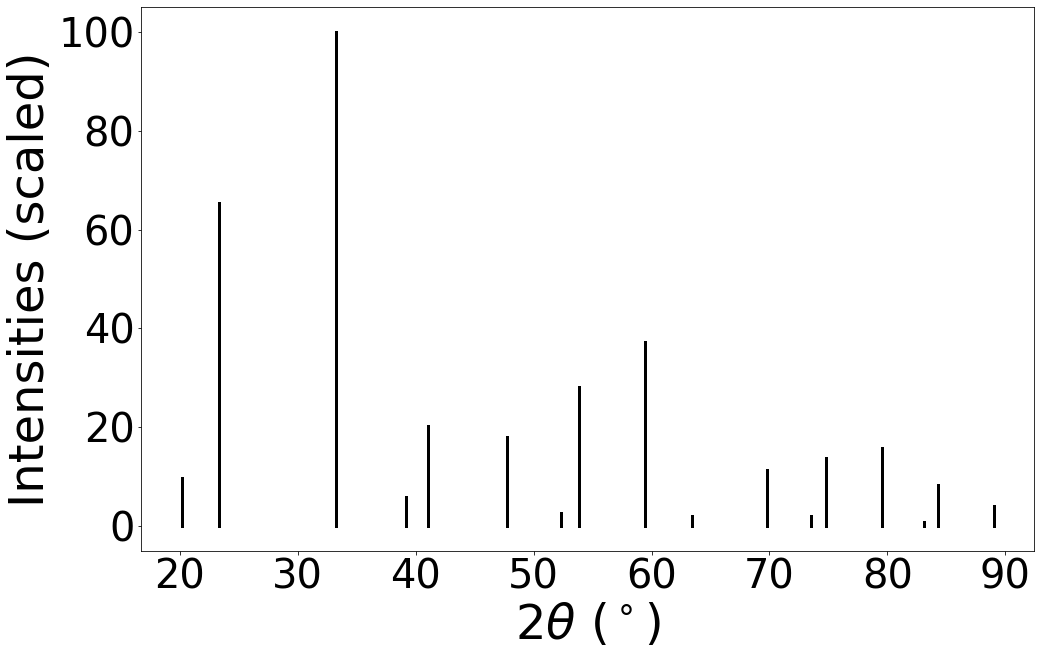

In [8]:

XRD = XRDCalculator(wavelength='CuKa', symprec=0, debye_waller_factors=None)

pattern = XRD.get_pattern(structure, scaled=True, two_theta_range=(0, 90))

hkl_indexes = pattern.hkls

theta = pattern.x
intensity = pattern.y

XRD.show_plot(structure, annotate_peaks = False)

Maintenant que nous avons les pics du diffractogramme correspondant à notre matériau, faisons un zoom sur les 3 premières comme demandées et affichons précisément les indices hkl, "2 theta" et l'inténsité.

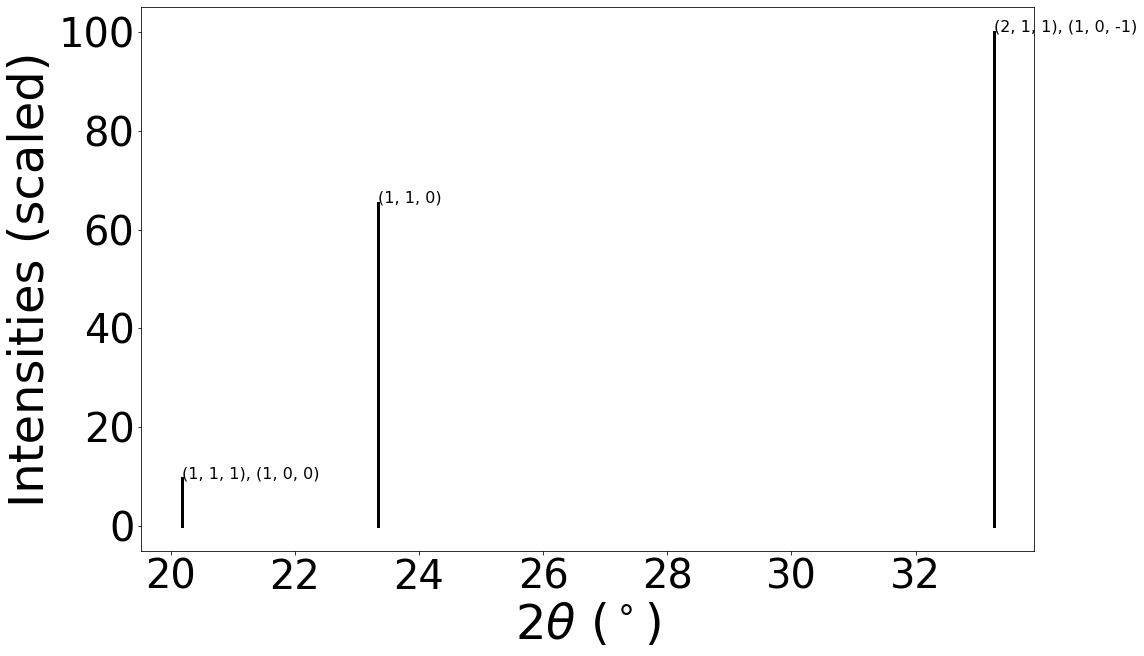

In [9]:
XRD.show_plot(structure, two_theta_range=(0, 35) ,annotate_peaks = True)

In [10]:
print("            ", "|", "1er pic", "              ", "|" ,"2ème pic", "             ", "|", "3ème pic")
print("_____________|________________________|________________________|_________________")
print("Indices hkl ", "|", hkl_indexes[0][0]["hkl"], "             |", hkl_indexes[1][0]["hkl"], "             |", hkl_indexes[2][0]["hkl"])
print('2\u03B8 (°)      ', "|", theta[0], "    |", theta[1], "    |", theta[2])
print("Intensité   ", "|", intensity[0], "     |", intensity[1], "     |", intensity[2])

             | 1er pic                | 2ème pic               | 3ème pic
_____________|________________________|________________________|_________________
Indices hkl  | (1, 1, 1)              | (1, 1, 0)              | (2, 1, 1)
2θ (°)       | 20.185606797156392     | 23.349210641299305     | 33.257682874204
Intensité    | 9.695950661044938      | 65.40161062160851      | 100.0
